# Computing Returns and Probability Plots
***


In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta

### Loading Financial Data into Pandas DF

For this example we will use a stock ticker and retrieve data for the last 5 years

In [30]:
# Use Goldman Sachs ticker
ticker = 'GS'
security_object = yf.Ticker(ticker)

# Retrieve historical prices for selected ticker
security_prices = security_object.history(start=(date.today() - relativedelta(years=5)))
# Only use close prices
df_prices = security_prices['Close']

df_prices.head(3)

Date
2017-12-04    226.496155
2017-12-05    224.399719
2017-12-06    222.249084
Name: Close, dtype: float64

### Computing Log Returns

To compute the log-returns requires taking the difference then the log. As this computation wil be used multiple times a function is defined which computes the log-returns. The stock price can have a sampling frequency of daily, monthly and annual whilst monthly and annual will require resampling the stock prices by using the 'resample' function then computing the log returns. Finally the function returns the log-returns for the required sampling frequency in a DataFrame.

The logarithmic return is a way of calculating the rate of return on an investment. To calculate it you need the inital value of the investment Vi, the final value Vf and the number of time periods t. You then take the natural logarithm of Vf divided by Vi, and divide the result by t:

\begin{equation*}
    R = \frac{ln(\frac{V_f}{V_i})}{t} * 100 \%
\end{equation*}

In [37]:
def log_returns(df, T):
    """
    Function to compute log returns for different sampling frequencies
    """
    # Assign stock price for selected ticker
    stock_price = df

    match T:
        # If conditional statement if sampling frequency is Daily
        case 'D':
            # Compute log-returns
            returns = np.diff(np.log(stock_price))
        # Normal case where sampling is annual or monthly
        case _:
            # Resample the stock price for the corresponding stock
            stock_price = stock_price.resample(T).last()
            # Compute log-returns
            returns = np.diff(np.log(stock_price))
    
    ## Assign returns of stock to DataFrame
    returns = pd.DataFrame({ticker: returns}, index = stock_price.index[1:])

    # Return the returns of the stock
    return(returns)

Using the implemented functions we compute the:
 - Daily log returns
 - Monthly log returns
 - Annual log returns
 

In [38]:
# Compute daily log returns of Goldman Sachs 'GS'
returns_GS_daily = log_returns(df_prices, 'D')
# Compute monthly log returns of Goldman Sachs 'GS'
returns_GS_monthly = log_returns(df_prices, 'M')
# Compute annual log returns of Goldman Sachs 'GS'
returns_GS_annual = log_returns(df_prices, 'A')

### Probability plots and using them to test whether log-returns are normally distributed

##### Testing whether Daily log-returns are normally distributed

Testing whether Daily log-returns are normally distributed

To test whether daily log-returns are normally distributed we can observe the graphical representations of the distribution of returns. The first plot is the plot of daily returns which shows the daily returns over the date range. The plot shows multiple anomalies by the spikes in the plot. This is one indication that there are extreme events in the distribution of returns.

The second plot is the histogram of the daily returns. The histogram shows the highest frequency of returns around 0, which is a important indication of normal distribution as the mean should be zero. The shape of the distribution also shows a bell curve with a quite symmetrical plot indicating a low skewness. However, another observation is that the distribution has multiple returns at the extremes of the distribution which can possibly indicate the distribution does not follow a normal distribution.

The third plot is the probability plot of the daily returns. This plot the empirical quantiles against the theoretical distributution quantiles. The ordered return values are plotted as well as the line of normality. Observing this we can view that multiple points depart from the straight line indicating that they departure from normality.

Observing the three plots overall shows that visually we can observe that the returns are not normally distributed. To prove this hypothesis we will compute the Jarque-Bera test which will test the returns if they are drawn from a normal distribution.

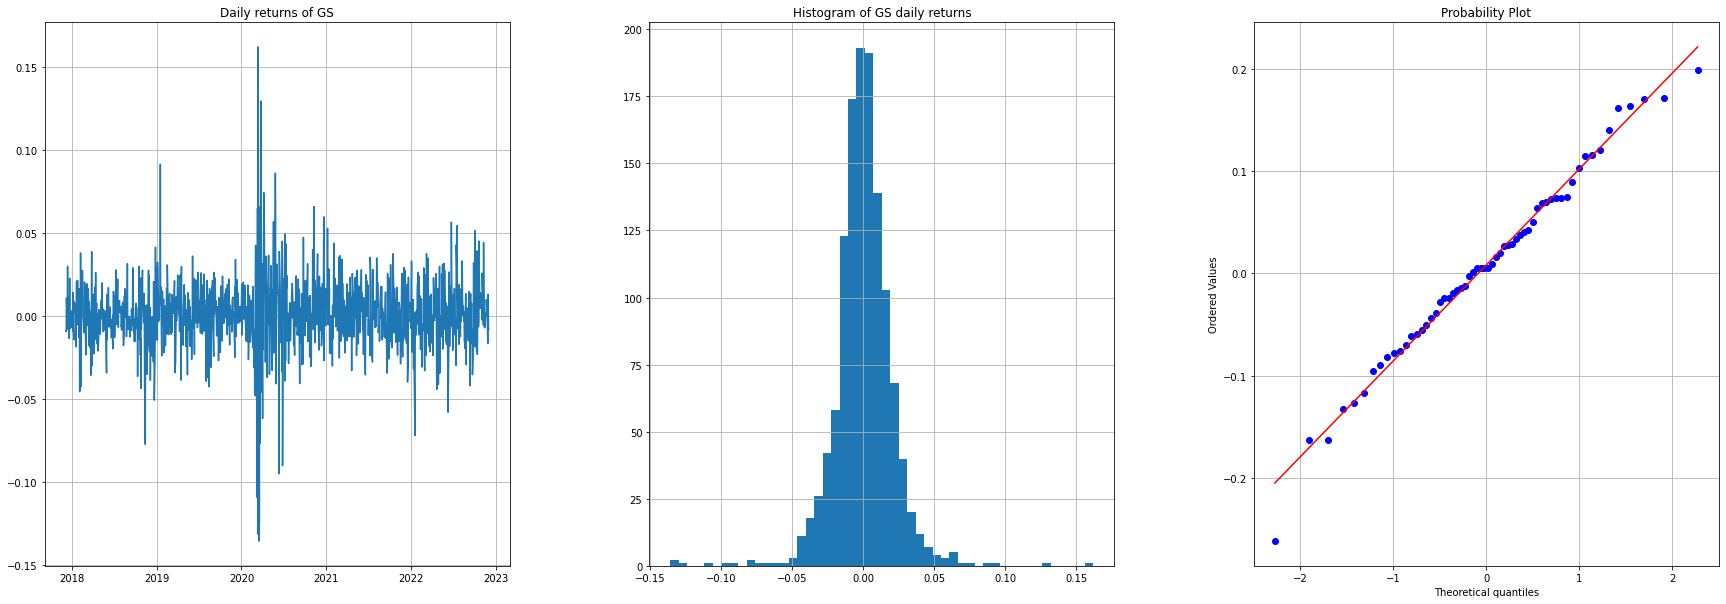

In [53]:
# Create grid for subplots along with the figure size
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,10))

# Plot daily returns of GS
ax1.plot(returns_GS_daily)
ax1.set_title("Daily returns of GS")
ax1.grid()

# Plot histogram of GS returns
returns_GS_daily.hist(ax = ax2, bins = 50)
ax2.set_title("Histogram of GS daily returns")

# Plot probability plot of GS daily returns
ax3 = stats.probplot(returns_GS_monthly['GS'], dist = 'norm', plot = plt)
plt.grid()
plt.show()

##### Testing whether Monthly log-returns are normally distributed

To test whether monthly log-returns are normally distributed we can observe the graphical representations of the distribution of returns. The first plot is the plot of monthly returns which shows the monthly returns over the date range. The plot shows consistent returns over the date range with small fluctuations.

The second plot is the histogram of the monthly returns. The histogram shows the highest frequency of returns around 0, which is a important indication of normal distribution as the mean should be zero. The shape of the distribution also shows a bell curve with a quite symmetrical plot indicating a low skewness. In addition the distribution shows minimum extreme events therefore indicating normal distribution.

The third plot is the probability plot of the monthly returns. This plot the empirical quantiles against the theoretical distributution quantiles. The ordered return values are plotted as well as the lien of normality. Observing this we can view that multiple points do not depart from the straight line indicating that they show normality.

Observing the three plots overall shows that visually we can observe that the returns are normally distributed. To prove this hypothesis we will compute the Jarque-Bera test which will test the returns if they are drawn from a normal distribution.

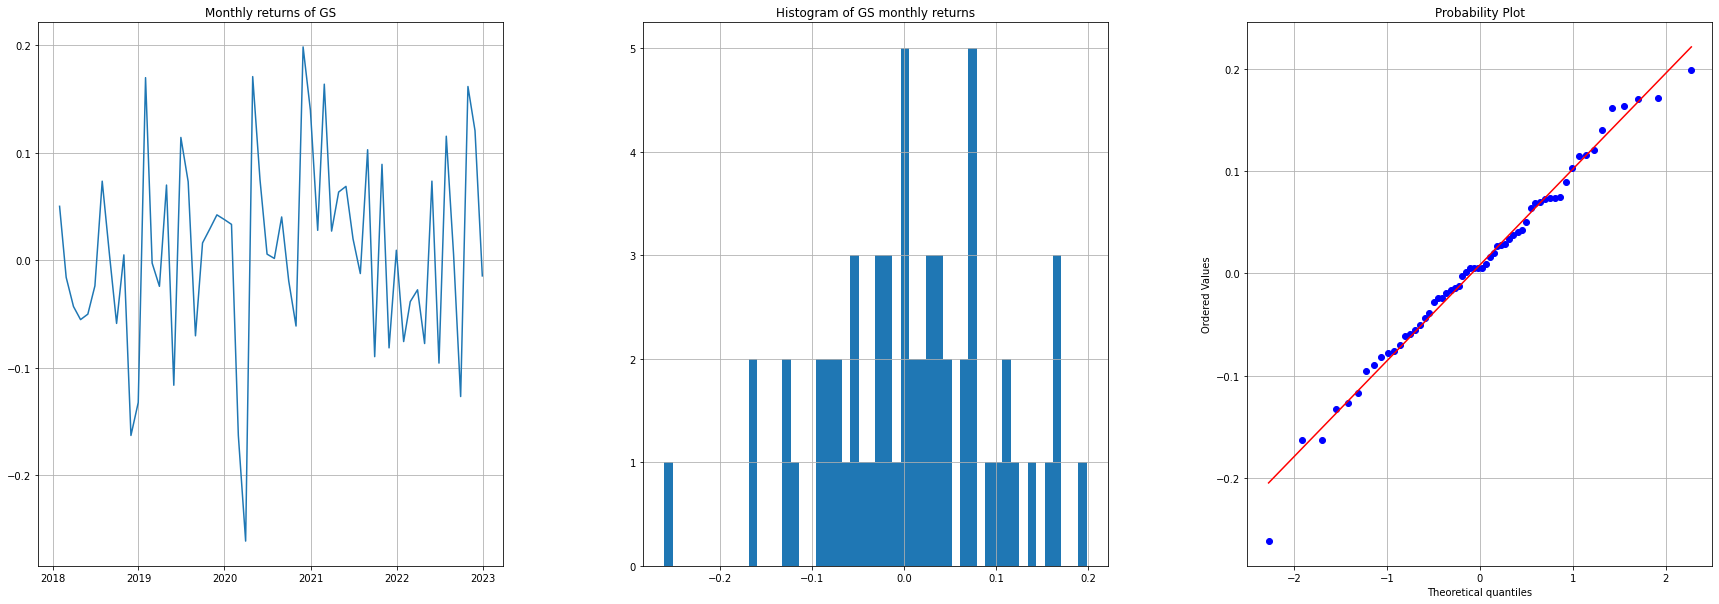

In [52]:
# Create grid for subplots along with the figure size
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,10))

# Plot monthly returns of GS
ax1.plot(returns_GS_monthly)
ax1.set_title("Monthly returns of GS")
ax1.grid()

# Plot histogram of GS returns
returns_GS_monthly.hist(ax = ax2, bins = 50)
ax2.set_title("Histogram of GS monthly returns")

# Plot probability plot of GS daily returns
ax3 = stats.probplot(returns_GS_monthly['GS'], dist = 'norm', plot = plt)
plt.grid()
plt.show()

##### Testing whether Annual log-returns are normally distributed

To test whether annual log-returns are normally distributed we can observe the graphical representations of the distribution of returns. The first plot is the plot of annual returns which shows the annual returns over the date range. The plot shows consistent returns over the date range with small fluctuations.

The second plot is the histogram of the annual returns. The histogram shows a fair distribution of returns, which is a important indication of normal distribution as the mean should be zero. In addition the distribution shows minimum extreme events therefore indicating normal distribution.

The third plot is the probability plot of the annual returns. This plot the empirical quantiles against the theoretical distributution quantiles. The ordered return values are plotted as well as the lien of normality. Observing this we can view that multiple points do not depart from the straight line indicating that they show normality. Another observation is that for every point above the norm line there is a corresponding point bellow the line which evenly distributes the returns.

Observing the three plots overall shows that visually we can observe that the returns are normally distributed. To prove this hypothesis we will compute the Jarque-Bera test which will test the returns if they are drawn from a normal distribution.

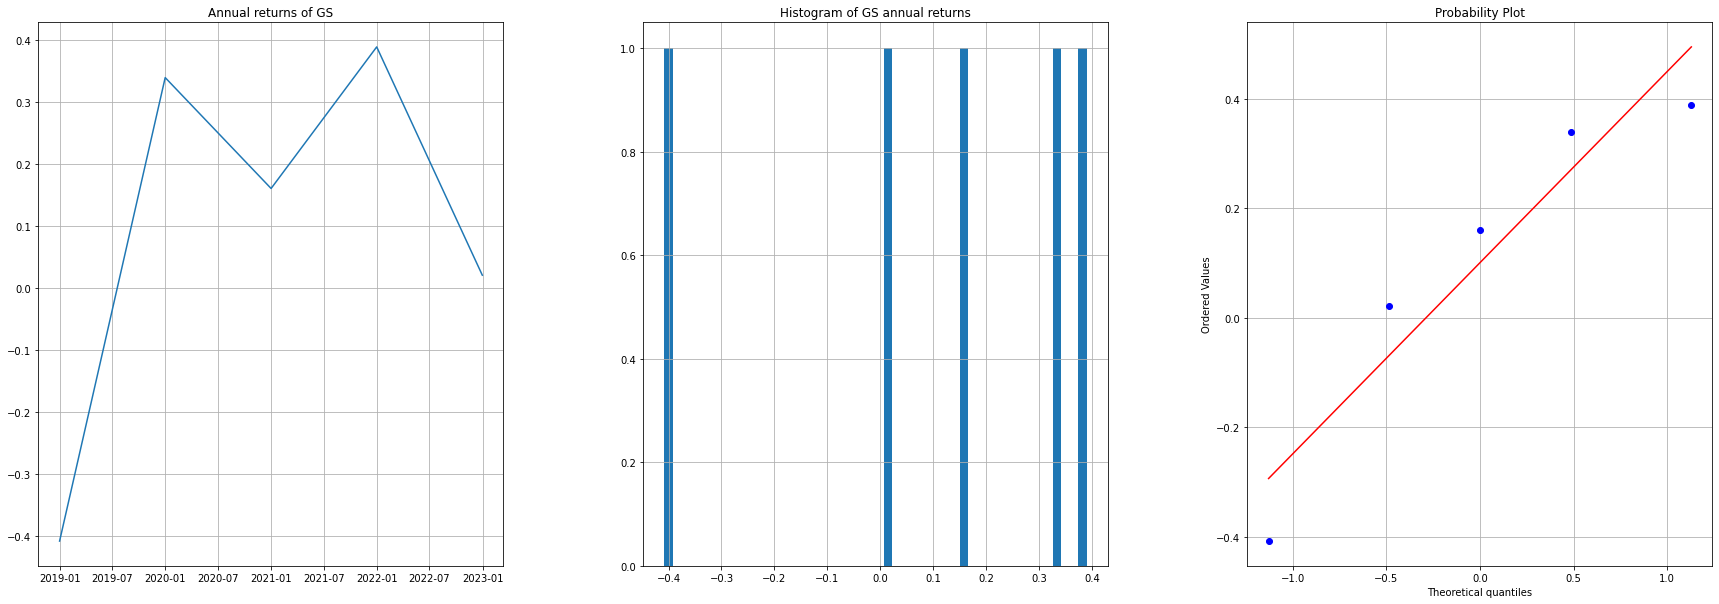

In [51]:
# Create grid for subplots along with the figure size
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30,10))

# Plot annual returns of GS
ax1.plot(returns_GS_annual)
ax1.set_title("Annual returns of GS")
ax1.grid()

# Plot histogram of GS returns
returns_GS_annual.hist(ax = ax2, bins = 50)
ax2.set_title("Histogram of GS annual returns")


# Plot probability plot of GS daily returns
ax3 = stats.probplot(returns_GS_annual['GS'], dist = 'norm', plot = plt)
plt.grid()
plt.show()

### Converting to simple returns

Having computed the log-returns we can compute the simple returns by taking the inverse natural log and subtracting 1

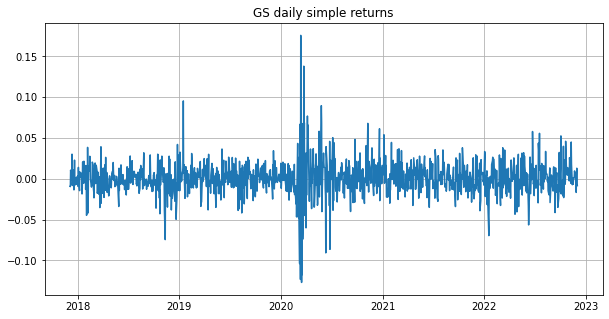

In [58]:
returns_GS_daily_simple = np.exp(returns_GS_daily) - 1
plt.figure(figsize=(10,5))
plt.plot(returns_GS_daily_simple)
plt.title("GS daily simple returns")
plt.grid()
plt.show()